# Операции над массивами. Транслирование.

Еще один способ применения операции векторизации - использовать имеющиеся в библиотеке NumPy возможности транслирования (broadcasting). Транслирование - набор правил по применению бинарных универсальных функций (сложение, вычитание, умножение и т.д.) к массивам различного размера.

## Введение в транслирование 

Для массивов одного размера бинарные операции выполняются поэлементно:

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Транслирование дает возможность выполнять подобные виды бинарных операций над массивами различных размеров, например, можно легко прибавить скалярное значение (рассматривая его как нульмерный массив) к массиву:

In [3]:
a + 5

array([5, 6, 7])

Транслирование в массивах большей размерности:

In [4]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Здесь одномерный массив а растягивается (транслируется) на второе измерение, чтобы соответствовать форме массива М.

In [6]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [7]:
b + a

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [8]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## Правила транслирования

1. Если размерность двух массивов отличается, форма массива с меньшей размерностью дополняется единицами с ведущей (левой) стороны.

2. Если форма двух массивов не совпадает в каком-то измерении, массив с формой, равной 1 в данном измерении, растягивается вплоть до соответствия форме другого массива.

3. Если в каком-либо измерении размеры массивов различаются и ни один не равен 1, генерируется ошибка.

### Транслирование. Пример 1

In [9]:
M = np.ones((2, 3))
a = np.arange(3)
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


In [10]:
M.shape

(2, 3)

In [11]:
a.shape

(3,)

По правилу 1, поскольку размерность массива а меньше, мы дополняем его измерения слева:
M.shape -> (2, 3)
a.shape -> (1, 3)

По правилу 2 первое измерение массивов различается, так что мы растягиваем его вплоть до совпадения
M.shape -> (2, 3)
a.shape -> (2, 3)

Формы совпадают и итоговая форма будет (2, 3)

In [12]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [13]:
(M + a).shape

(2, 3)

### Транслирование. Пример 2.

Рассмотрим пример, в котором необходимо транслировать оба массива:


In [14]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(a.shape)
print(b)
print(b.shape)

[[0]
 [1]
 [2]]
(3, 1)
[0 1 2]
(3,)


In [15]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Транслирование. Пример 3.

Рассмотрим пример, в котором два массива несовместимы:

In [16]:
M = np.ones((3, 2))
a = np.arange(3)
print(M, '-'*10, a, sep='\n')

[[1. 1.]
 [1. 1.]
 [1. 1.]]
----------
[0 1 2]


In [17]:
try:
    M+a
except:
    print('---Формы массивов не совпадают!!!!!---')

---Формы массивов не совпадают!!!!!---


In [18]:
print(a[:, np.newaxis])

[[0]
 [1]
 [2]]


In [19]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

## Транслирование на практике

### Центрирование массива

In [20]:
x = np.random.random((10, 3))
x

array([[0.58167041, 0.52324465, 0.42364115],
       [0.97661553, 0.25056313, 0.91315764],
       [0.01149807, 0.5238235 , 0.45940973],
       [0.97434515, 0.19095353, 0.68129892],
       [0.81054322, 0.80747792, 0.91264421],
       [0.56740287, 0.01338602, 0.23492919],
       [0.92163054, 0.74807475, 0.23130681],
       [0.79275782, 0.77791712, 0.12755587],
       [0.87644946, 0.74143829, 0.57929684],
       [0.57246151, 0.09517469, 0.38793906]])

In [26]:
xmean = x.mean(0)
xmean

array([0.70853746, 0.46720536, 0.49511794])

Можно отцентрировать массив вычитанием среднего значения (это операция транслирования):

In [28]:
x_centered = x - xmean
x_centered

array([[-0.12686705,  0.05603929, -0.07147679],
       [ 0.26807808, -0.21664223,  0.4180397 ],
       [-0.69703939,  0.05661814, -0.03570821],
       [ 0.2658077 , -0.27625183,  0.18618097],
       [ 0.10200576,  0.34027256,  0.41752627],
       [-0.14113459, -0.45381934, -0.26018875],
       [ 0.21309308,  0.28086939, -0.26381113],
       [ 0.08422036,  0.31071176, -0.36756207],
       [ 0.167912  ,  0.27423293,  0.0841789 ],
       [-0.13607595, -0.37203067, -0.10717889]])

Чтобы убедиться в правильности выполнения данной операции - среднее значение центрированного значение должно быть близко к 0:

In [29]:
x_centered.mean(0)

array([-2.22044605e-17,  4.44089210e-17,  1.11022302e-17])

В пределах машинной точности среднее значение массива теперь равно 0

### Построение графика двумерной функции

In [35]:
# задаем для x и y 50 шагов от 0 до 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

# print(x, y, sep='\n')
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

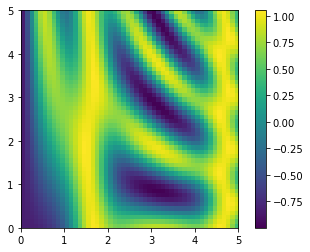

In [43]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();